1 [src](https://platform.stratascratch.com/data-projects/customer-churn-prediction)
2 [src](https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset)

[code](https://www.analyticsvidhya.com/blog/2022/09/bank-customer-churn-prediction-using-machine-learning/)

Run in Google Drive, colab
---

1. loh=gin google drive, add `colab` plugin
2. create 2024 foloder, enter it and create data, named data; download data from Kaggle to it.
3. create colab, open left menu and upload kaggle data intp `data`
4. run

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

import gc
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
# import pickle
#import matplotlib.cm as cm
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("data/archive.zip")

In [3]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X = df.iloc[:, 2:-1]
y = df.iloc[:, -1]

X.head()

,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,France,Female,42,2,0.00,1,1,1,101348.88
1,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,France,Female,42,8,159660.80,3,1,0,113931.57
3,France,Female,39,1,0.00,2,0,0,93826.63
4,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [16]:
df[['country']].value_counts()

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [6]:
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['country'])

encoder.fit(X, y)
X_cleaned = encoder.transform(X)


In [7]:
X_cleaned

,country_1,country_2,country_3,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,1,0,0,Female,42,2,0.00,1,1,1,101348.88
1,0,1,0,Female,41,1,83807.86,1,0,1,112542.58
2,1,0,0,Female,42,8,159660.80,3,1,0,113931.57
3,1,0,0,Female,39,1,0.00,2,0,0,93826.63
4,0,1,0,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,Male,39,5,0.00,2,1,0,96270.64
9996,1,0,0,Male,35,10,57369.61,1,1,1,101699.77
9997,1,0,0,Female,36,7,0.00,1,0,1,42085.58
9998,0,0,1,Male,42,3,75075.31,2,1,0,92888.52


In [8]:
X_cleaned.rename(columns={'country_1':'Fance','country_2':'Spain','country_3':'Germany'},inplace=True)
X=X_cleaned
X

,Fance,Spain,Germany,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,1,0,0,Female,42,2,0.00,1,1,1,101348.88
1,0,1,0,Female,41,1,83807.86,1,0,1,112542.58
2,1,0,0,Female,42,8,159660.80,3,1,0,113931.57
3,1,0,0,Female,39,1,0.00,2,0,0,93826.63
4,0,1,0,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,Male,39,5,0.00,2,1,0,96270.64
9996,1,0,0,Male,35,10,57369.61,1,1,1,101699.77
9997,1,0,0,Female,36,7,0.00,1,0,1,42085.58
9998,0,0,1,Male,42,3,75075.31,2,1,0,92888.52


In [9]:
X['gender']=X['gender'].apply(lambda x:1 if x=='Female' else 0)
X

,Fance,Spain,Germany,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,1,0,0,1,42,2,0.00,1,1,1,101348.88
1,0,1,0,1,41,1,83807.86,1,0,1,112542.58
2,1,0,0,1,42,8,159660.80,3,1,0,113931.57
3,1,0,0,1,39,1,0.00,2,0,0,93826.63
4,0,1,0,1,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,0,39,5,0.00,2,1,0,96270.64
9996,1,0,0,0,35,10,57369.61,1,1,1,101699.77
9997,1,0,0,1,36,7,0.00,1,0,1,42085.58
9998,0,0,1,0,42,3,75075.31,2,1,0,92888.52


In [10]:
# none is nan
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fance             10000 non-null  int64  
 1   Spain             10000 non-null  int64  
 2   Germany           10000 non-null  int64  
 3   gender            10000 non-null  int64  
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [13]:
y_pred = classifier.predict(X_test)

In [14]:
print(classification_report(y_test, y_pred))
cnf_matrix = confusion_matrix(y_test, y_pred)
#print(cnf_matrix)
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1595
           1       0.66      0.52      0.58       405

    accuracy                           0.85      2000
   macro avg       0.77      0.73      0.75      2000
weighted avg       0.84      0.85      0.84      2000



0.849

In [15]:
print(classification_report(y_test, y_pred))
cnf_matrix = confusion_matrix(y_test, y_pred)
#print(cnf_matrix)
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1595
           1       0.66      0.52      0.58       405

    accuracy                           0.85      2000
   macro avg       0.77      0.73      0.75      2000
weighted avg       0.84      0.85      0.84      2000



0.849

In [16]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=plt.cm.summer):
    plt.clf
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
 
    width, height = cm.shape
 
    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center',color='black',fontsize=22)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

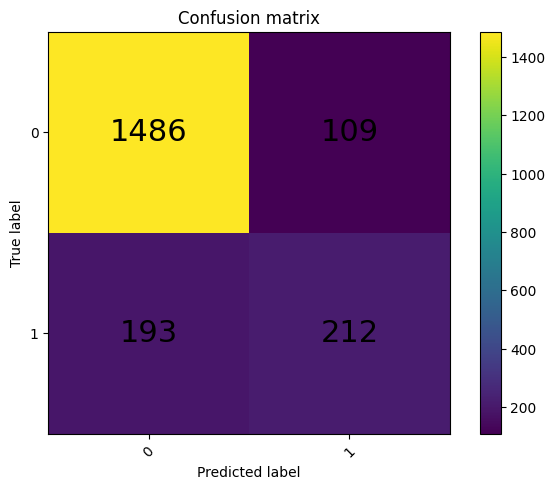

In [17]:
plot_confusion_matrix(cnf_matrix, np.unique(y_pred))


In [19]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 20)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 85.36 %
Standard Deviation: 1.62 %
